In [71]:
import pandas as pd
import pprint
import ipywidgets as widgets
from ipywidgets import interact
import matplotlib.pyplot as plt
import math
from pylab import rcParams
rcParams['figure.figsize'] = 25, 13

In [2]:
from pymongo import MongoClient

from IPython.core.display import display, HTML
[display(HTML("<style>.container { width:100% !important; }</style>"))];

In [13]:
with MongoClient('mongodb://localhost:27017/') as client:
    database = client["dwh"]
    aggregated_data = database.aggregated_data
    country_codes = database.country_codes
    medal_wins = database.medal_wins
    who_ppp_2017 = database.who_ppp_2017

In [14]:
def out(Country):
    #return list(aggregated_data.find({"country": Country}))
    #values = list(aggregated_data.find({"country": 'Germany'}))[0]['medal_wins']['gold']['by_year']
    data = aggregated_data.find({"country": Country})
    x_values, y_values = get_medals(data)
    show_graph(x_values, y_values)
    return 0

In [15]:
def get_medals(data):
    # Get all gold medals, sorting the dict
    dict_gold = data[0]['medal_wins']['gold']['by_year']
    dict_gold = {k: dict_gold[k] for k in sorted(dict_gold.keys(), key=lambda x: int(x))}
    
    # Get all silver medals, sorting the dict
    dict_silver = data[0]['medal_wins']['silver']['by_year']
    dict_silver = {k: dict_silver[k] for k in sorted(dict_silver.keys(), key=lambda x: int(x))}
    
    # Get all bronze medals, sorting the dict
    dict_bronze = data[0]['medal_wins']['bronze']['by_year']
    dict_bronze = {k: dict_bronze[k] for k in sorted(dict_bronze.keys(), key=lambda x: int(x))}
    
    
    # Defining x and y values for the graph
    years = {}
    for year in sorted(set(dict_gold.keys()) | set(dict_silver.keys()) | set(dict_bronze.keys())):
        years[year] = dict_gold.get(year, 0) + dict_silver.get(year, 0) + dict_bronze.get(year, 0)

    #x_values = years.keys()
    x_values = []
    y_values = []
    for x in years:
        x_values += [x]
        y_values += [years[x]]
        
    return x_values, y_values

In [18]:
def show_graph(x_values, y_values):
    df=pd.DataFrame({'x_values': x_values, 'y_values': y_values })
    
    # plot
    plt.plot( 'x_values', 'y_values', data=df)
    plt.show()

In [19]:
interact(out, Country=[cc['country'] for cc in country_codes.find()]);

interactive(children=(Dropdown(description='Country', options=('Ukraine', 'Jordan', 'Macedonia', 'Slovakia', '…

In [68]:
all_data = list(aggregated_data.find({}))
all_data[0]['medal_wins']['bronze']['sum'] + all_data[0]['medal_wins']['silver']['sum'] + all_data[0]['medal_wins']['gold']['sum']
all_data[0]['health_expenditures']

x_values = []
y_values = []

for country in all_data:
    #print(country['country'])
    #print(country['medal_wins']['bronze']['sum'] + country['medal_wins']['silver']['sum'] + country['medal_wins']['gold']['sum'])
    #print(country['health_expenditures']['absolute'])
    
    break
    

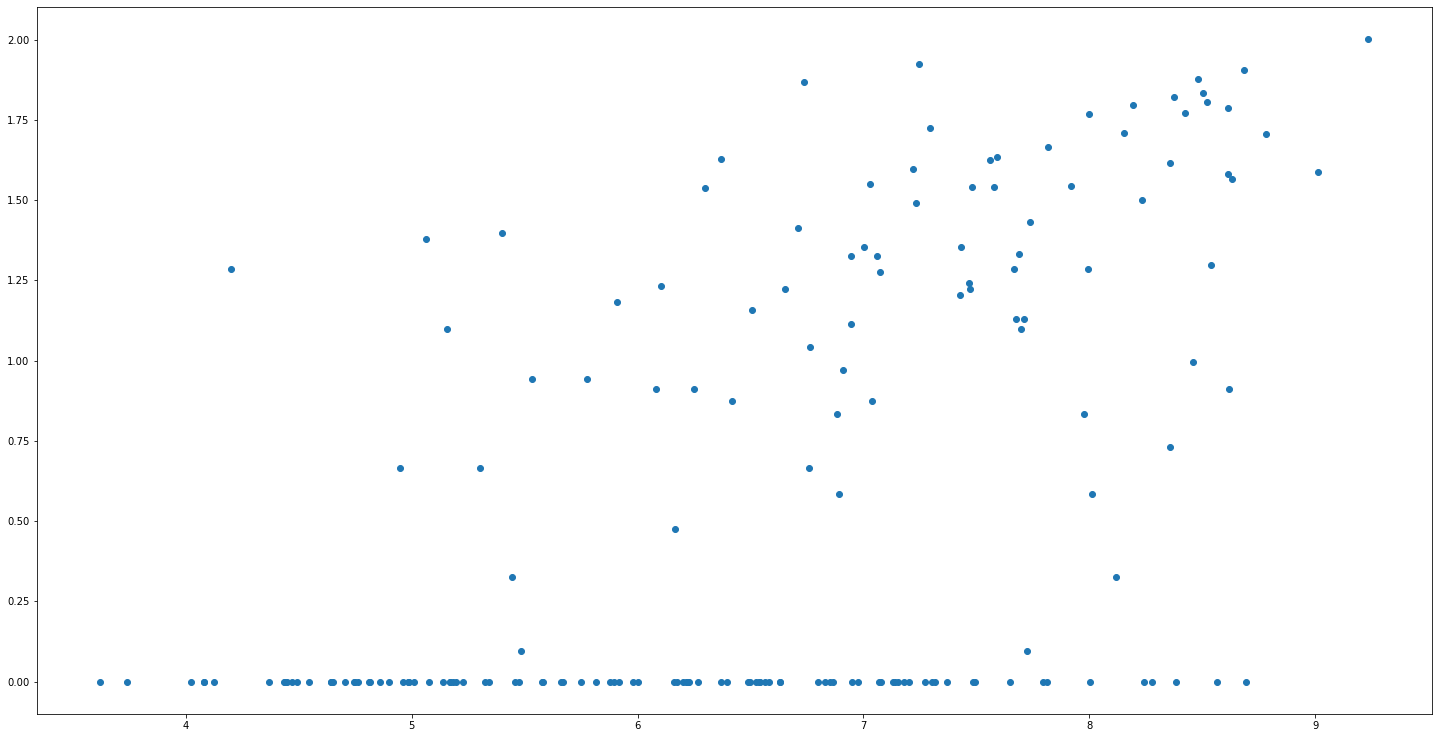

In [84]:
medals_by_expenditures = {}
medals_by_expenditures_log = {}
for color in ['gold','silver','bronze']:
    for row in aggregated_data.find():
        exp = math.log(row['health_expenditures']['per_capita'])
        medals_by_expenditures[exp] = medals_by_expenditures.get(exp, 0) + sum(row['medal_wins'][color]['by_year'][year] for year in row['medal_wins'][color]['by_year'] if int(year) >= 2000)
        medals_by_expenditures_log[exp] = math.log(medals_by_expenditures[exp]) if medals_by_expenditures[exp] > 2 else 0
        
for k in medals_by_expenditures_log:
    medals_by_expenditures_log[k] = math.log(medals_by_expenditures_log[k]) if medals_by_expenditures_log[k] else 0
    
plt.scatter(medals_by_expenditures_log.keys(), medals_by_expenditures_log.values())